In [2]:
#Speech Emotion Recognition

In [3]:
#importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
lp=pd.read_csv("/Default_Fin.csv")

In [22]:
lp

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


In [23]:
lp=lp.drop('Index', axis=1)

In [25]:
lp.head()

,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,8754.36,532339.56,0
1,0,9806.16,145273.56,0
2,1,12882.60,381205.68,0
3,1,6351.00,428453.88,0
4,1,9427.92,461562.00,0


In [24]:
lp.isnull().sum()

Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

In [15]:
lp.describe()

,Employed,Bank Balance,Annual Salary,Defaulted
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.705600,10024.498524,402203.782224,0.033300
std,0.455795,5804.579486,160039.674988,0.179428
min,0.000000,0.000000,9263.640000,0.000000
25%,0.000000,5780.790000,256085.520000,0.000000
50%,1.000000,9883.620000,414631.740000,0.000000
75%,1.000000,13995.660000,525692.760000,0.000000
max,1.000000,31851.840000,882650.760000,1.000000


In [16]:
lp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Employed       10000 non-null  int64  
 1   Bank Balance   10000 non-null  float64
 2   Annual Salary  10000 non-null  float64
 3   Defaulted      10000 non-null  int64  
dtypes: float64(2), int64(2)
memory usage: 390.6 KB


In [19]:
lp.dtypes

Employed           int64
Bank Balance     float64
Annual Salary    float64
Defaulted          int64
dtype: object

In [ ]:
#DATA EXPLORATION

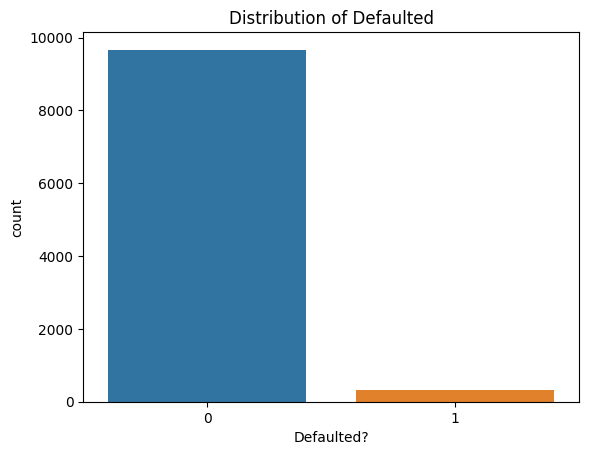

In [27]:
sns.countplot(x='Defaulted?', data=lp)
plt.title("Distribution of Defaulted")
plt.show()

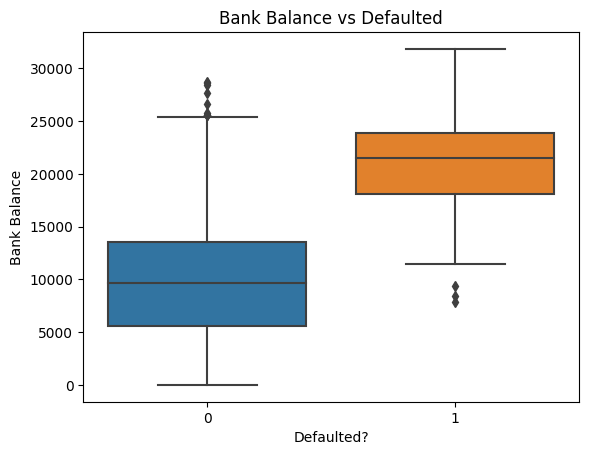

In [30]:
sns.boxplot(x="Defaulted?",y="Bank Balance",data=lp)
plt.title("Bank Balance vs Defaulted")
plt.show()

In [31]:
lp.corr()

,Employed,Bank Balance,Annual Salary,Defaulted?
Employed,1.000000,-0.203578,0.753985,-0.035420
Bank Balance,-0.203578,1.000000,-0.152243,0.350119
Annual Salary,0.753985,-0.152243,1.000000,-0.019871
Defaulted?,-0.035420,0.350119,-0.019871,1.000000


<Axes: >

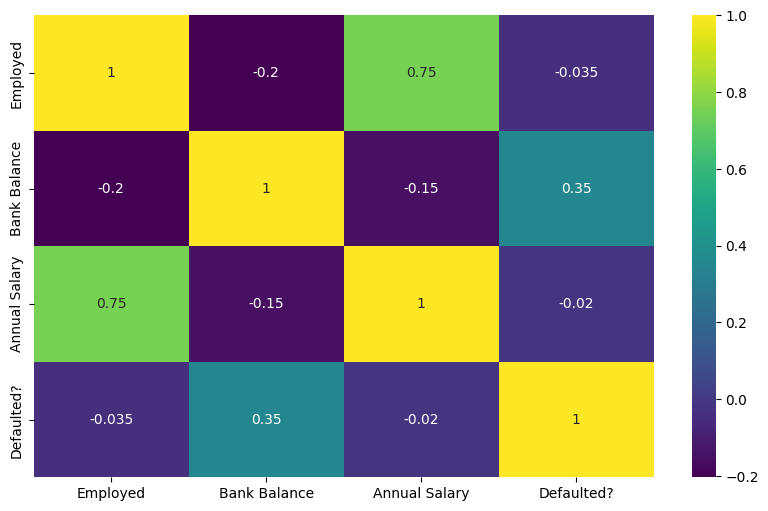

In [32]:
plt.figure(figsize=(10,6))
sns.heatmap(lp.corr(), cmap='viridis', annot=True)

In [38]:
X = lp.drop('Defaulted?', axis=1).values

In [34]:
y = lp['Defaulted?'].values

In [41]:
#FEATURE SCALING

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#BUILDING THE MODEL

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#LOGISTIC REGRESSION

In [45]:
classifier_lr = LogisticRegression()

In [47]:
classifier_lr.fit(X_train, y_train)

LogisticRegression()

In [48]:
y_pred = classifier_lr.predict(X_test)


In [49]:
print('Logistic Regression:')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred))
print('\nconfusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Logistic Regression:

Accuracy Score: 0.97

confusion_matrix:
[[1921   10]
 [  50   19]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.66      0.28      0.39        69

    accuracy                           0.97      2000
   macro avg       0.81      0.64      0.69      2000
weighted avg       0.96      0.97      0.96      2000



In [ ]:
#DECISON TREEE CLASSIFIER

In [50]:
classifier_dc = DecisionTreeClassifier()

In [51]:
classifier_dc.fit(X_train, y_train)

DecisionTreeClassifier()

In [52]:
y_pred = classifier_dc.predict(X_test)


In [53]:
print('DecisionTree:')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred))
print('\nconfusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

DecisionTree:

Accuracy Score: 0.9545

confusion_matrix:
[[1889   42]
 [  49   20]]
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1931
           1       0.32      0.29      0.31        69

    accuracy                           0.95      2000
   macro avg       0.65      0.63      0.64      2000
weighted avg       0.95      0.95      0.95      2000



In [ ]:
#GAUSSIAN NAIVEBAYES

In [54]:
classifier_nb= GaussianNB()

In [55]:
classifier_nb.fit(X_train, y_train)

GaussianNB()

In [56]:
y_pred = classifier_nb.predict(X_test)


In [57]:
print('GaussianNB:')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred))
print('\nconfusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

GaussianNB:

Accuracy Score: 0.9635

confusion_matrix:
[[1914   17]
 [  56   13]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.43      0.19      0.26        69

    accuracy                           0.96      2000
   macro avg       0.70      0.59      0.62      2000
weighted avg       0.95      0.96      0.96      2000



In [ ]:
#RandomForestClassifier

In [59]:
classifier_rf= RandomForestClassifier()

In [60]:
classifier_rf.fit(X_train, y_train)

RandomForestClassifier()

In [61]:
y_pred = classifier_rf.predict(X_test)


In [62]:
print('RandomForestClassifier:')
print('\nAccuracy Score:',accuracy_score(y_test, y_pred))
print('\nconfusion_matrix:')
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

RandomForestClassifier:

Accuracy Score: 0.9635

confusion_matrix:
[[1908   23]
 [  50   19]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1931
           1       0.45      0.28      0.34        69

    accuracy                           0.96      2000
   macro avg       0.71      0.63      0.66      2000
weighted avg       0.96      0.96      0.96      2000



In [63]:
#loan prediction for a new data

In [64]:
lp.sample(10)

,Employed,Bank Balance,Annual Salary,Defaulted?
5401,1,11783.28,461802.36,0
825,1,12371.16,435255.96,0
2345,1,9246.24,534114.96,0
7913,1,4395.12,628330.92,0
9039,1,204.36,293906.52,0
8851,1,0.00,361181.04,0
5520,1,10789.20,475567.68,0
9937,0,21306.96,164822.28,0
5624,0,11110.80,148610.40,0
4511,0,11845.80,156029.88,0


In [85]:
new_lp=(0,1.65,6.34)

In [86]:
lp= np.asarray(new_lp)

In [87]:
lp_reshaped=lp.reshape(1,-1)

In [88]:
prediction = classifier_lr.predict(lp_reshaped)

In [89]:
if(prediction[0]==1):
    print('Eligible to get loan')
else:
    print('Not Eligible to get loan')

Not Eligible to get loan


In [70]:
new_lp2=(1,40000.00, 1000000.00)

In [71]:
lp2= np.asarray(new_lp2)

In [72]:
lp2_reshaped=lp2.reshape(1,-1)

In [73]:
prediction2 = classifier_lr.predict(lp2_reshaped)

In [74]:
if(prediction2[0]==1):
    print('Eligible to get loan')
else:
    print('Not Eligible to get loan')

Eligible to get loan
